# Best neighborhood in Pittsburgh

Team Green

Nathan Barta (nab180@pitt.edu), Leela Bhargavi Pinnamaraju (lep86@pitt.edu), Shelton Bai (shb126@pitt.edu)

## Introduction & Metric

Because defining the best neighborhood in Pittsburgh by a single metric is likely to be inaccurate or biased, we decided to focus on three datasets to come closer to a more “accurate” definition of the best neighborhood:

Trees - A set of all the trees cared for by the Department of Public Works Forestry Division

Fires - A set of all the fire incidents which have been responded to by the Bureau of Fire

Playgrounds - A set of all the playgrounds in the city of Pittsburgh

    We chose these three datasets in particular to analyze which neighborhood was the most environmentally friendly because we believe that the better neighborhood is the one that takes good care of the nature surrounding it as well as their public goods. Part of the reasoning for our metric is the perceived "continuing value" of the things represented in our data. Fires are very temporary and do not hurt the score of a location too bad. Trees and maintained playgrounds will provide a continuing positive value to the community.

## The Data

- https://data.wprdc.org/dataset/playgrounds/resource/47350364-44a8-4d15-b6e0-5f79ddff9367
A set of all the playgrounds in the city of Pittsburgh
- https://data.wprdc.org/dataset/city-trees/resource/1515a93c-73e3-4425-9b35-1cd11b2196da
A set of all the trees cared for by the Department of Public Works Forestry Division
- https://data.wprdc.org/dataset/fire-incidents-in-city-of-pittsburgh/resource/8d76ac6b-5ae8-4428-82a4-043130d17b02
A set of all the fire incidents which have been responded to by the Bureau of Fire

## Code

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from math import isnan
dictionaryMetric = {}

In [5]:
treesData = pd.read_csv("https://data.wprdc.org/datastore/dump/1515a93c-73e3-4425-9b35-1cd11b2196da", index_col="id", low_memory=False)
fireData = pd.read_csv("https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02")
playgroundsData = pd.read_csv("https://data.wprdc.org/datastore/dump/47350364-44a8-4d15-b6e0-5f79ddff9367")

def treeMetricAdd(): # Weight .1 point per tree
    for i in range(0, len(treesData) - 1):
        if (treesData["neighborhood"].iloc[i] in dictionaryMetric):
            dictionaryMetric[treesData["neighborhood"].iloc[i]] += 0.1
        else:
            dictionaryMetric[treesData["neighborhood"].iloc[i]] = 0.1

def fireMetricAdd(): # Weight -0.005 point per fire
    for i in range(0, len(fireData) - 1):
        if (fireData["neighborhood"].iloc[i] in dictionaryMetric):
            dictionaryMetric[fireData["neighborhood"].iloc[i]] -= 0.005
        else:
            dictionaryMetric[fireData["neighborhood"].iloc[i]] = -0.005
            
names = []
names = playgroundsData['neighborhood'].unique()
length_of_dataset = len(playgroundsData)-1
length_of_names = len(names)-1

def playgroundsMetricAdd(): # Weight 2 point per playground
    counter = 0
    while(counter < length_of_names):
        for i in range(len(playgroundsData)-1):
            if(playgroundsData['neighborhood'].iloc[i] is names[counter]):
                if(names[counter] in dictionaryMetric):
                    dictionaryMetric[playgroundsData['neighborhood'].iloc[i]] += 2.0
                else:
                    dictionaryMetric[playgroundsData['neighborhood'].iloc[i]] = 2.0
        counter += 1

treeMetricAdd()
fireMetricAdd()
playgroundsMetricAdd()

dictionaryMetric = {k: dictionaryMetric[k] for k in dictionaryMetric if type(k) is str} # Remove NaN
for k in dictionaryMetric: # Round values
    dictionaryMetric[k] = round(dictionaryMetric[k])

<BarContainer object of 91 artists>

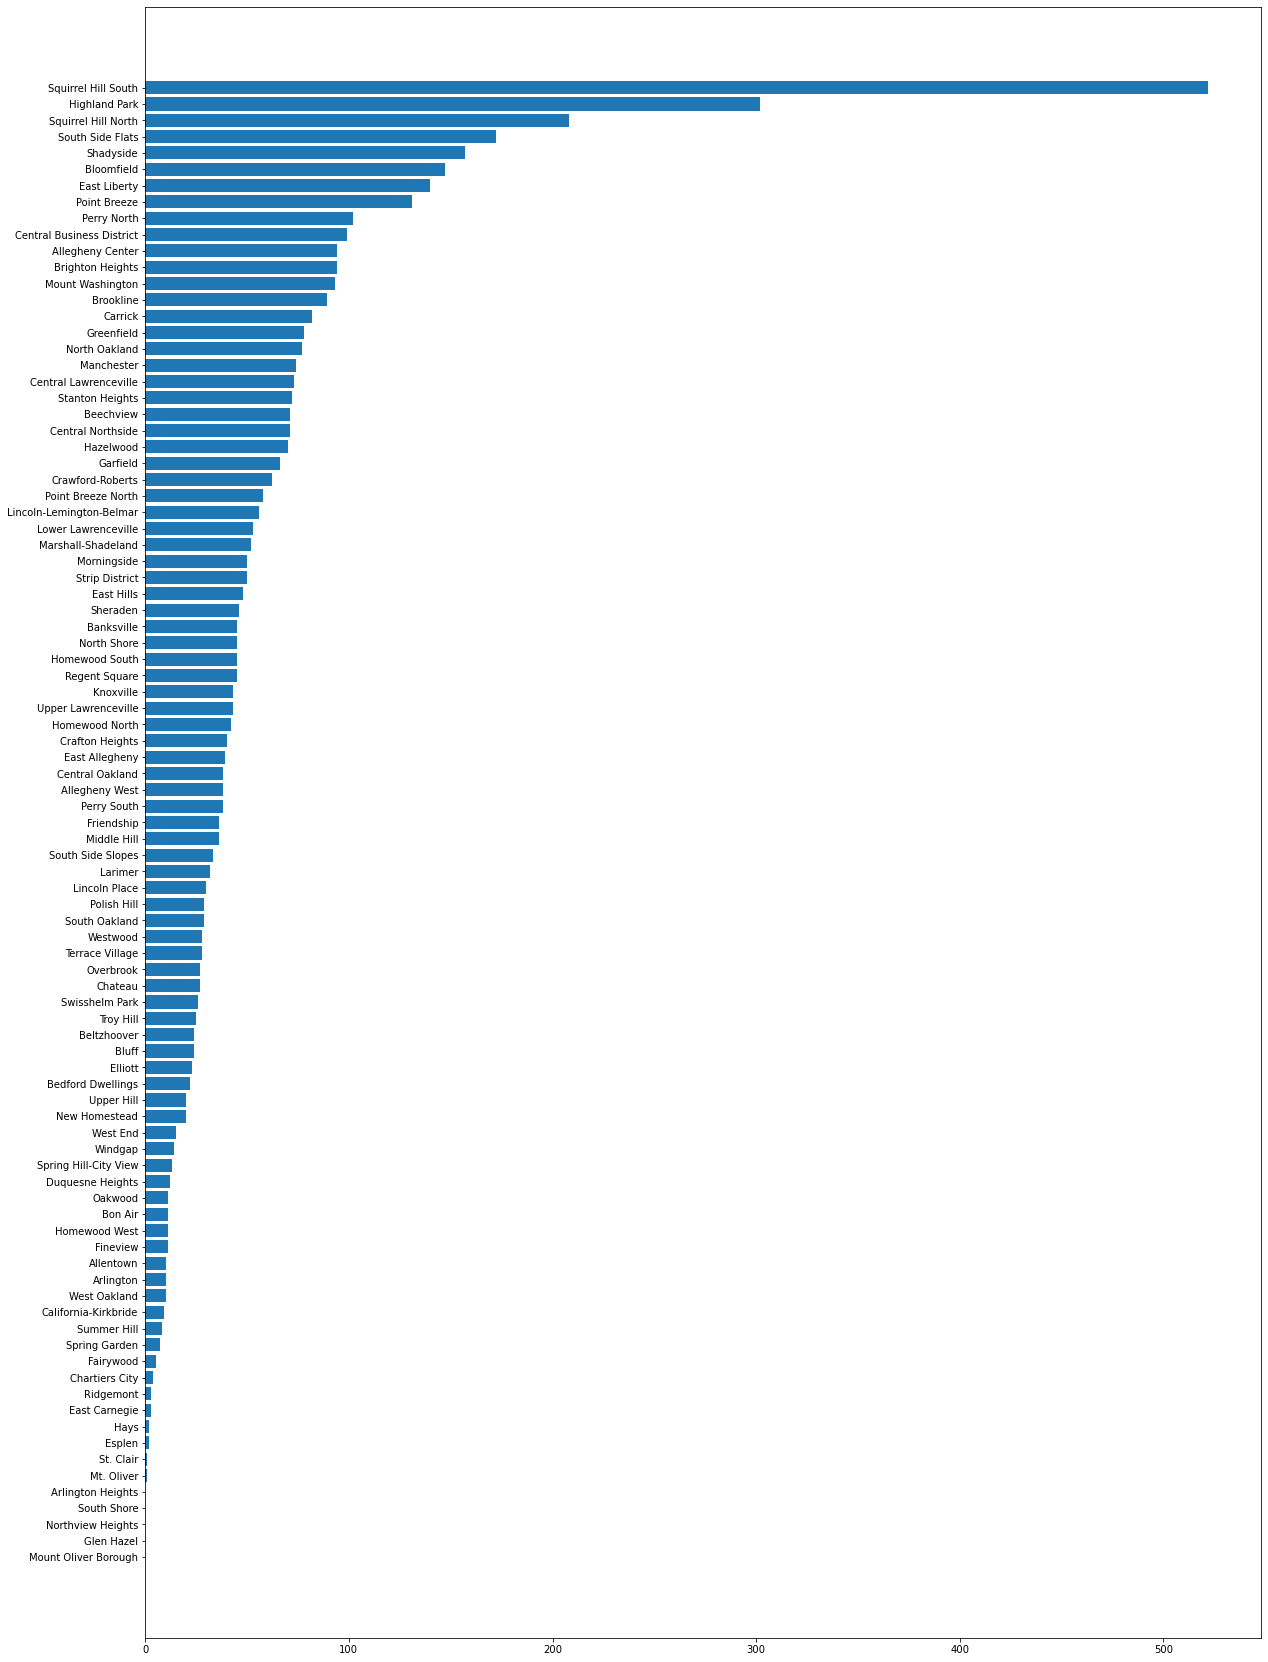

In [6]:
data = pd.DataFrame(dictionaryMetric.items(), columns=["Neighborhood", "Value"]).sort_values(by=["Value"])

plt.figure(figsize=(20, 30))
plt.barh(data["Neighborhood"], data["Value"])

<AxesSubplot:>

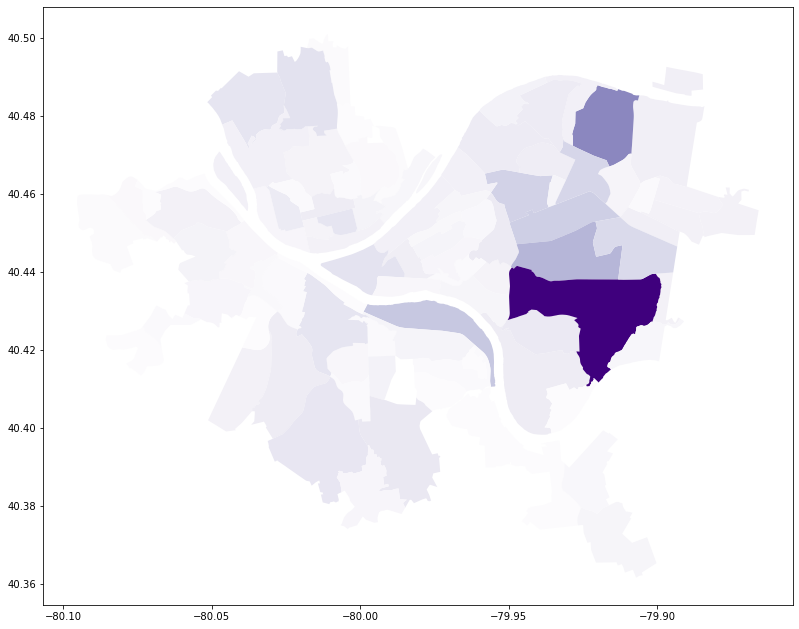

In [17]:
# Chloropleth config. (Remember: Install descartes, geopandas)
pittsburgh = gpd.read_file("http://pghgis-pittsburghpa.opendata.arcgis.com/datasets/dbd133a206cc4a3aa915cb28baa60fd4_0.geojson")
chloropleth = pittsburgh.merge(data, left_on="hood", right_on="Neighborhood")
chloropleth.plot(column="Value", cmap = 'Purples', figsize=(20,11))

## Conclusion

Shelton: 

    After gathering all the datasets, giving each one a score, and combining all of them into a singular metric, we found Squirrel Hill South to be the best neighborhood, with a combined score of 3445. This combined score takes into account the number of trees, playgrounds and fires in the neighborhood. However, this may not be the most accurate, as the data set used for counting trees only includes the trees cared for by the Department of Public Works Forestry Division, and the fires data set had many incidents where the neighborhood was omitted from the data. Had the data been more complete or accurate, the resulting scores may change.
    
Leela:

    We came to the conclusion that Squirrel Hill South was the best neighborhood in relation to our criteria. We took into consideration the number of trees, fires, and playgrounds to determine that SHS had a score of 3445. This may be biased in a way because we were looking at more environmental factors and if we chose a different dataset such as crimes or pollution, we may get a different answer. The way we graded the trees dataset was also something we had to change multiple times because we gave too many points to the number of trees and so we had to scale that down a lot because it inflated scores. The fire dataset was also not complete as there were some cells missing and we had also given too many points to the number of fires which then created negative scores. To fix that, we also decreased the number of negative points given to fires. Along with that, the analysis of the playgrounds could have been done differently as well as there was a maintenance column but in this dataset, only 4 playgrounds had no maintenance and so I felt that it would not make a large difference. Having an environmentally friendly place to live in is how we’re judging the best neighborhood. Since Squirrel Hill South has so many trees, it helps reduce pollution and it’s proven that nature has a positive impact on people’s lives. The number of playgrounds shows that it is a safe place for children to stay in as well proving that Squirrel Hill South is the best neighborhood to live in.

Nathan: 

    Our final data shows that Squirrel Hill South is the best neighborhood in Pittsburgh. My trees data also selected Squirrel Hill South as the best neighborhood in Pittsburgh. This makes sense because trees have a very high rate in the data, and there are a lot of them. Part of the reasoning for our metric is the perceived "continuing value" of the things represented in our data. Fires, are very temporary, and do not hurt the score of a location too bad. Trees and maintained playgrounds will provide a continuing positive value to the community. Squirrel Hill South contains the most amount of trees, and is therefore very high value. The sheer quantity of trees outpaces the need for playgrounds, or the negative effects of fire.